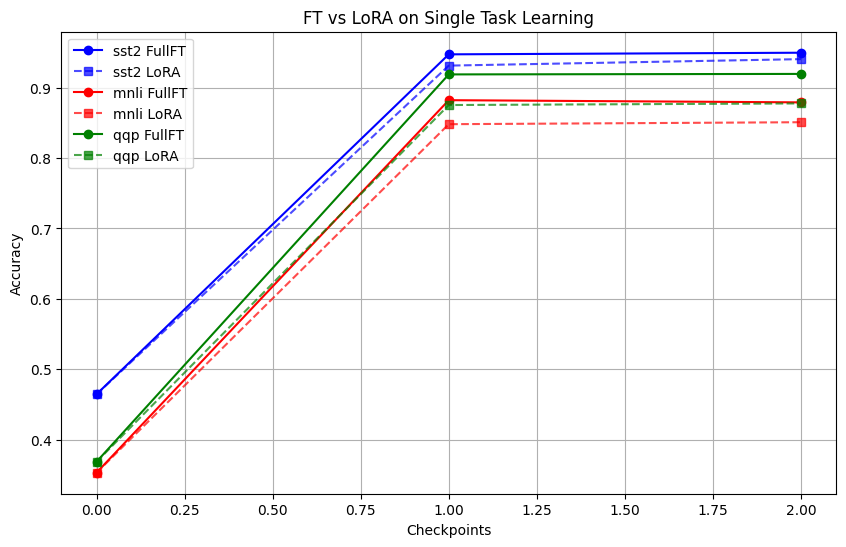

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example accuracy data across checkpoints (replace with actual experimental results)
ckpt = [0, 1, 2]
models = {
    "LLaMA_1B_sst2_FullFT": [0.4644, 0.9472, 0.9495],
    "LLaMA_1B_mnli_FullFT": [0.3530, 0.8821, 0.8790],
    "LLaMA_1B_qqp_FullFT": [0.3685, 0.9187, 0.9194],
    "LLaMA_1B_sst2_LoRA_16": [0.4644, 0.9312, 0.9404],
    "LLaMA_1B_mnli_LoRA_16": [0.3530, 0.8480, 0.8508],
    "LLaMA_1B_qqp_LoRA_16": [0.3685, 0.8752, 0.8775]
}

plt.figure(figsize=(10, 6))
colors = ["blue", "red", "green"]
tasks = ["sst2", "mnli", "qqp"]
for i, task in enumerate(tasks):
    plt.plot(ckpt, models[f"LLaMA_1B_{task}_FullFT"], marker='o', linestyle='-', label=f"{task} FullFT", color=colors[i])
    plt.plot(ckpt, models[f"LLaMA_1B_{task}_LoRA_16"], marker='s', linestyle='--', label=f"{task} LoRA", color=colors[i], alpha=0.7)
plt.xlabel("Checkpoints")
plt.ylabel("Accuracy")
plt.title("FT vs LoRA on Single Task Learning")
plt.legend()
plt.grid(True)

plt.savefig('FT_vs_LoRA_on_Single_Task_Learning.pdf', bbox_inches='tight')

plt.show()

FT vs different lora rank (4,8,16,32,64)

similar

C:\Users\Karen\AppData\Local\Temp\ipykernel_6984\1733935893.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 1])


Combined plot has been generated and saved as both PDF and PNG files.


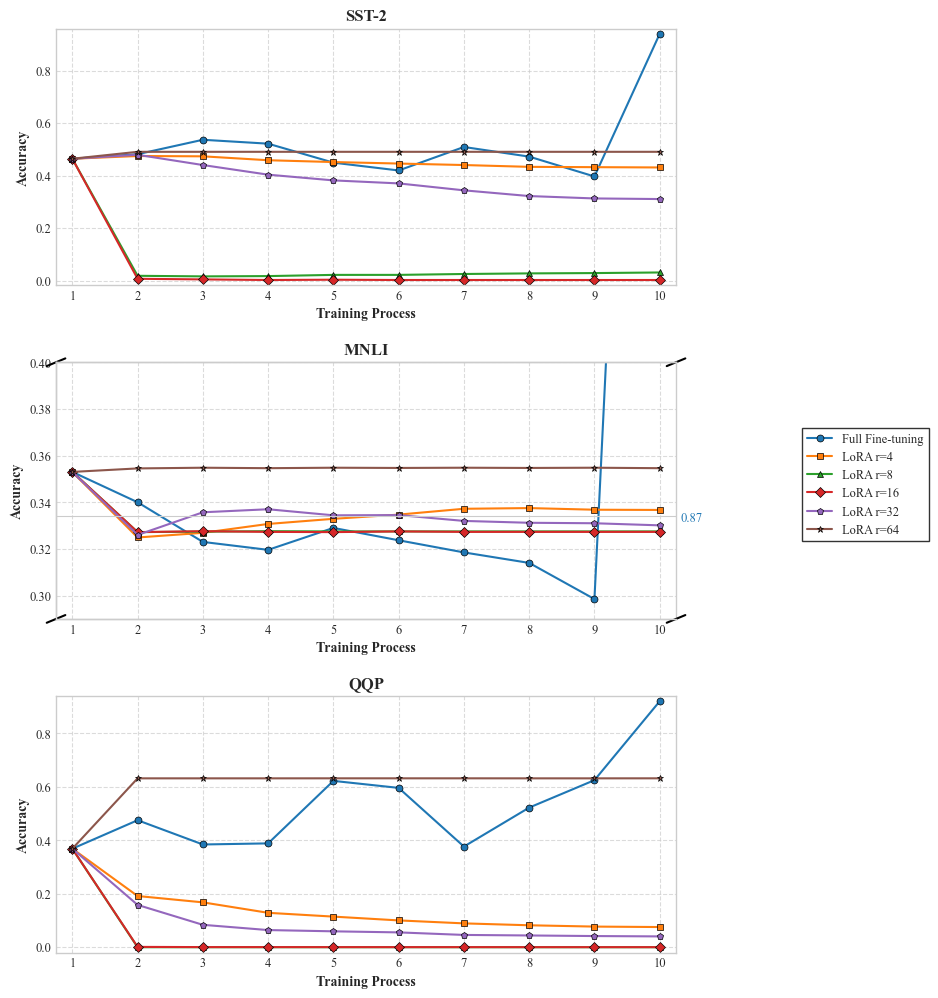

In [ ]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# Set professional style for academic publications
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'

# Load data from JSON
with open("similar_learning.json", "r") as f:
    models = json.load(f)

# Task definitions
tasks = ["sst2", "mnli", "qqp"]
task_descriptions = {
    "sst2": "SST-2",
    "mnli": "MNLI", 
    "qqp": "QQP"
}
task_full_names = {
    "sst2": "Stanford Sentiment Treebank",
    "mnli": "Multi-Genre Natural Language Inference",
    "qqp": "Quora Question Pairs"
}

# Define a consistent color palette
colors = {
    "FullFT": "#1f77b4",    # Deep blue
    "LoRA_4": "#ff7f0e",    # Orange
    "LoRA_8": "#2ca02c",    # Green
    "LoRA_16": "#d62728",   # Red
    "LoRA_32": "#9467bd",   # Purple
    "LoRA_64": "#8c564b"    # Brown
}
markers = {
    "FullFT": "o",
    "LoRA_4": "s", 
    "LoRA_8": "^", 
    "LoRA_16": "D",
    "LoRA_32": "p",
    "LoRA_64": "*"
}
model_display_names = ["Full Fine-tuning", "LoRA r=4", "LoRA r=8", "LoRA r=16", "LoRA r=32", "LoRA r=64"]
# Create combined plot - three tasks vertically arranged
fig = plt.figure(figsize=(8, 12))
gs = GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.3)

for i, task in enumerate(tasks):
    ax = fig.add_subplot(gs[i])
    
    # Plot each model's line
    for j, model_name in enumerate(models):
        model_data = models[model_name]
        steps = np.arange(1, len(model_data["steps"])+1)[:10]  # Ensure only 10 points
        accuracy = model_data["accuracy"][task][:10]  # Limit to 10 points
        
        # Draw lines and markers
        ax.plot(
            steps, 
            accuracy,
            label=model_display_names[j],
            color=colors[model_name],
            marker=markers[model_name],
            markersize=5,
            linewidth=1.5,
            markeredgecolor='black',
            markeredgewidth=0.5
        )
    
    # Set axis labels and title
    ax.set_title(f"{task_descriptions[task]}", fontweight='bold', fontsize=12)
    ax.set_ylabel("Accuracy", fontweight='bold', fontsize=10)
    
    # Only add x-label to the bottom plot
    ax.set_xlabel("Training Process", fontweight='bold', fontsize=10)
    
    # Set x-axis ticks and limits
    ax.set_xticks(np.arange(1, 11))
    ax.set_xlim(0.75, 10.25)  # Add margin on both sides
    
    # For MNLI plot, set custom y-axis limits with break
    if task == "mnli":
        # Create a second y-axis that will show the high value
        ax2 = ax.twinx()
        ax2.set_ylim(0.85, 0.9)  # Range for showing the spike
        ax2.set_yticks([0.87])
        ax2.tick_params(axis='y', colors=colors["FullFT"])
        ax2.spines['right'].set_visible(False)
        
        # Main axis shows the lower range
        ax.set_ylim(0.29, 0.4)  # Focus on the 0.3-0.4 range
        
        # Add a broken axis effect
        d = .015  # Size of the diagonal lines
        kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
        ax.plot((-d, +d), (1-d, 1+d), **kwargs)  # Top-left diagonal
        ax.plot((1-d, 1+d), (1-d, 1+d), **kwargs)  # Top-right diagonal
        
        # Add the same for the secondary axis
        kwargs.update(transform=ax2.transAxes)
        ax2.plot((-d, +d), (-d, +d), **kwargs)  # Bottom-left diagonal
        ax2.plot((1-d, 1+d), (-d, +d), **kwargs)  # Bottom-right diagonal
    else:
        # For other tasks, set y-axis limits normally
        ymin = min([min(models[model]["accuracy"][task][:10]) for model in models]) - 0.02
        ymax = max([max(models[model]["accuracy"][task][:10]) for model in models]) + 0.02
        ax.set_ylim(ymin, ymax)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.7)

# Create a single legend for all plots on the right side
handles, labels = ax.get_legend_handles_labels()
fig.legend(
    handles, labels,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=9,
    frameon=True,
    fancybox=False,
    edgecolor='black'
)

# Adjust layout to make room for legend on right
plt.tight_layout(rect=[0, 0, 0.85, 1])

# Save figures
plt.savefig('ft_vs_lora_similar_learning.pdf', format='pdf', bbox_inches='tight')

print("Combined plot has been generated and saved as both PDF and PNG files.")

Dissimilar

C:\Users\Karen\AppData\Local\Temp\ipykernel_6984\2289171025.py:101: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.85, 0.98])


Learning curves comparison plot has been generated and saved.


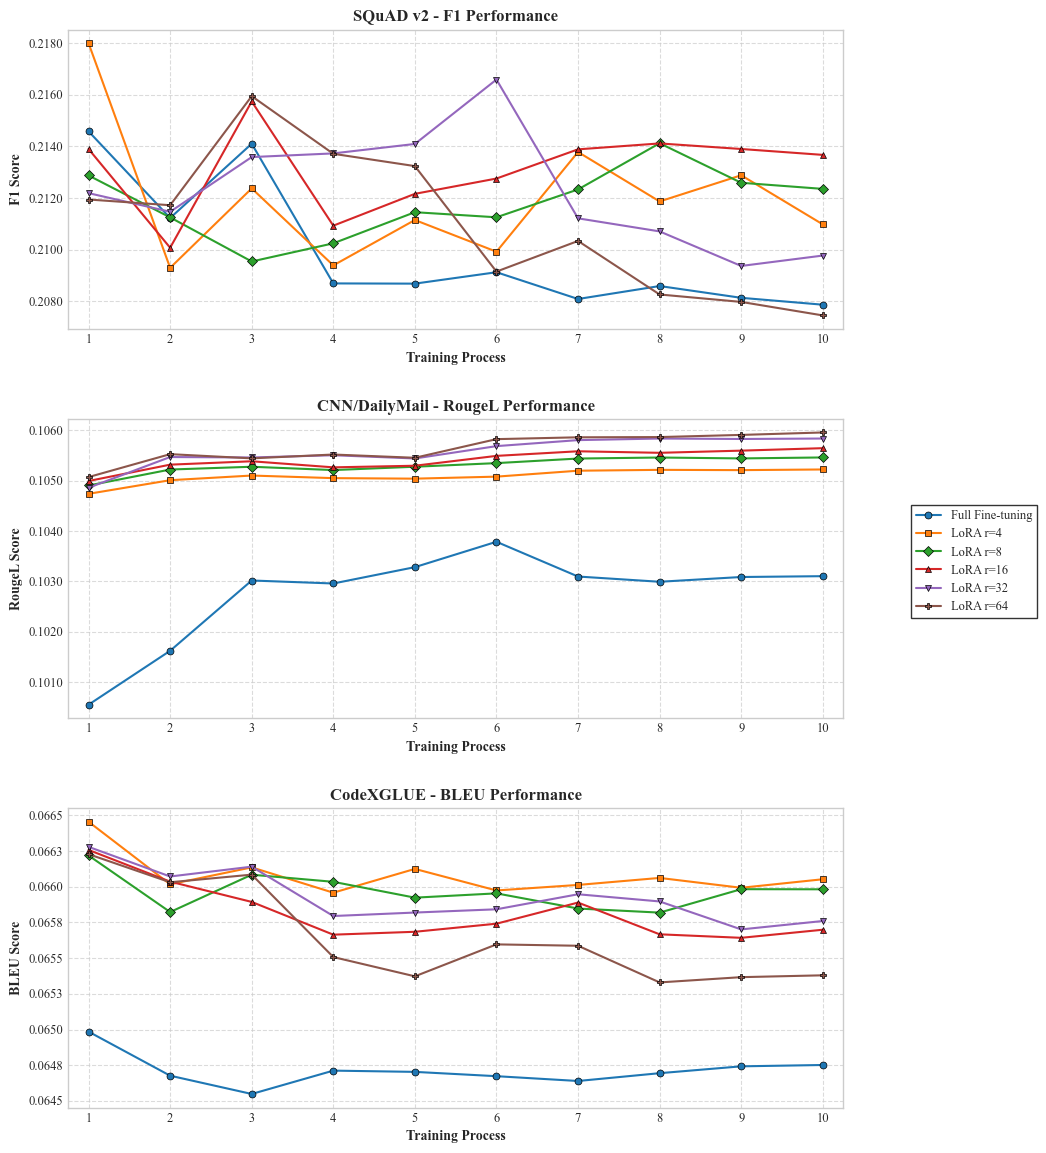

In [37]:

import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# Set professional style for academic publications
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'

with open("dissimilar_learning.json", "r") as f:
    data = json.load(f)


# Task definitions
models = ["FullFT", "LoRA_4", "LoRA_8", "LoRA_16", "LoRA_32", "LoRA_64"]
model_display_names = ["Full Fine-tuning", "LoRA r=4", "LoRA r=8", "LoRA r=16", "LoRA r=32", "LoRA r=64"]

# Define a consistent color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
markers = ['o', 's', 'D', '^', 'v', 'P']

# Create subplot with shared legend - vertical layout
fig = plt.figure(figsize=(10, 14))
gs = GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.3)

# Create subplots for each task
ax1 = fig.add_subplot(gs[0])  # QA F1 plot
ax2 = fig.add_subplot(gs[1])  # Summarization RougeL plot
ax3 = fig.add_subplot(gs[2])  # Code BLEU plot

axes = [ax1, ax2, ax3]
metrics = ["f1", "rougeL", "bleu"]
task_names = ["qa", "summarization", "code"]
y_labels = ["F1 Score", "RougeL Score", "BLEU Score"]
display_metrics = ["F1", "RougeL", "BLEU"]

# Plot lines
lines = []
labels = []

dataset = {
    "qa": "SQuAD v2",
    "summarization": "CNN/DailyMail",
    "code": "CodeXGLUE",
}

for j, (ax, metric, task_name, y_label, display_metric) in enumerate(zip(axes, metrics, task_names, y_labels, display_metrics)):
    for i, model_name in enumerate(models):
        # Use training steps as x-axis (use the common first 10 points)
        # Convert steps to process number 1-10
        training_steps = data[model_name]["steps"][:10]
        training_process = np.arange(1, 11)
        
        # Extract performance data
        if task_name == "code":
            values = data[model_name]["performance"][task_name][metric][:10]
        else:
            values = data[model_name]["performance"][task_name][metric][:10]
        
        # Plot with exact 10 points
        line, = ax.plot(training_process, values, color=colors[i], marker=markers[i], markersize=5,
                 linewidth=1.5, markeredgecolor='black', markeredgewidth=0.5)
                 
        # Only store lines and labels once for the legend
        if j == 0:
            lines.append(line)
            labels.append(model_display_names[i])
    
    # Set x-axis properties
    ax.set_xlabel('Training Process', fontweight='bold')
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticks(np.arange(1, 11))
    ax.set_xlim(0.75, 10.25)  # Add margin on both sides
    
    # Set y-axis properties with appropriate limits
    ax.set_ylabel(y_label, fontweight='bold')
    ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
    
    # Add grid, but make it subtle
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Add title with proper font
    ax.set_title(f'{dataset[task_name]} - {display_metric} Performance', fontweight='bold', fontsize=12)

# Create a single legend for all plots placed on the right side
fig.legend(lines, labels, loc='center right', bbox_to_anchor=(1.1, 0.5),
           frameon=True, fancybox=False, edgecolor='black')

# Adjust layout for legend on right
plt.tight_layout(rect=[0, 0, 0.85, 0.98])
plt.savefig("ft_vs_lora_dissimilar_learning.pdf", format='pdf', bbox_inches='tight')

print("Learning curves comparison plot has been generated and saved.")



## Negative Transfer Effect
Gradient Cosine Similarity Heatmap

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Example gradient vectors for three tasks (replace with actual gradient data)
tasks = ['Task1', 'Task2', 'Task3']
grad_task1 = np.array([1.0, 2.0, 3.0, 4.0])    # placeholder gradient for Task1
grad_task2 = np.array([2.0, 1.0, 0.0, -1.0])   # placeholder gradient for Task2
grad_task3 = np.array([-1.0, -2.0, -3.0, -4.0])# placeholder gradient for Task3

# Stack gradients and normalize each to unit length for cosine similarity
grads = np.vstack([grad_task1, grad_task2, grad_task3])
norms = np.linalg.norm(grads, axis=1, keepdims=True)
grads_normalized = grads / norms

# Compute cosine similarity matrix (dot product of normalized gradients)
cos_sim_matrix = grads_normalized.dot(grads_normalized.T)

# Plot heatmap of cosine similarities
plt.figure(figsize=(5,4))
sns.heatmap(cos_sim_matrix, annot=True, xticklabels=tasks, yticklabels=tasks, 
            cmap="coolwarm", center=0, vmin=-1, vmax=1)
plt.title('Gradient Cosine Similarity Between Tasks')
plt.tight_layout()
plt.show()


# Knowledge Retention Analysis
## Retention-Forgetting Curves

Combined retention performance plot has been generated and saved.


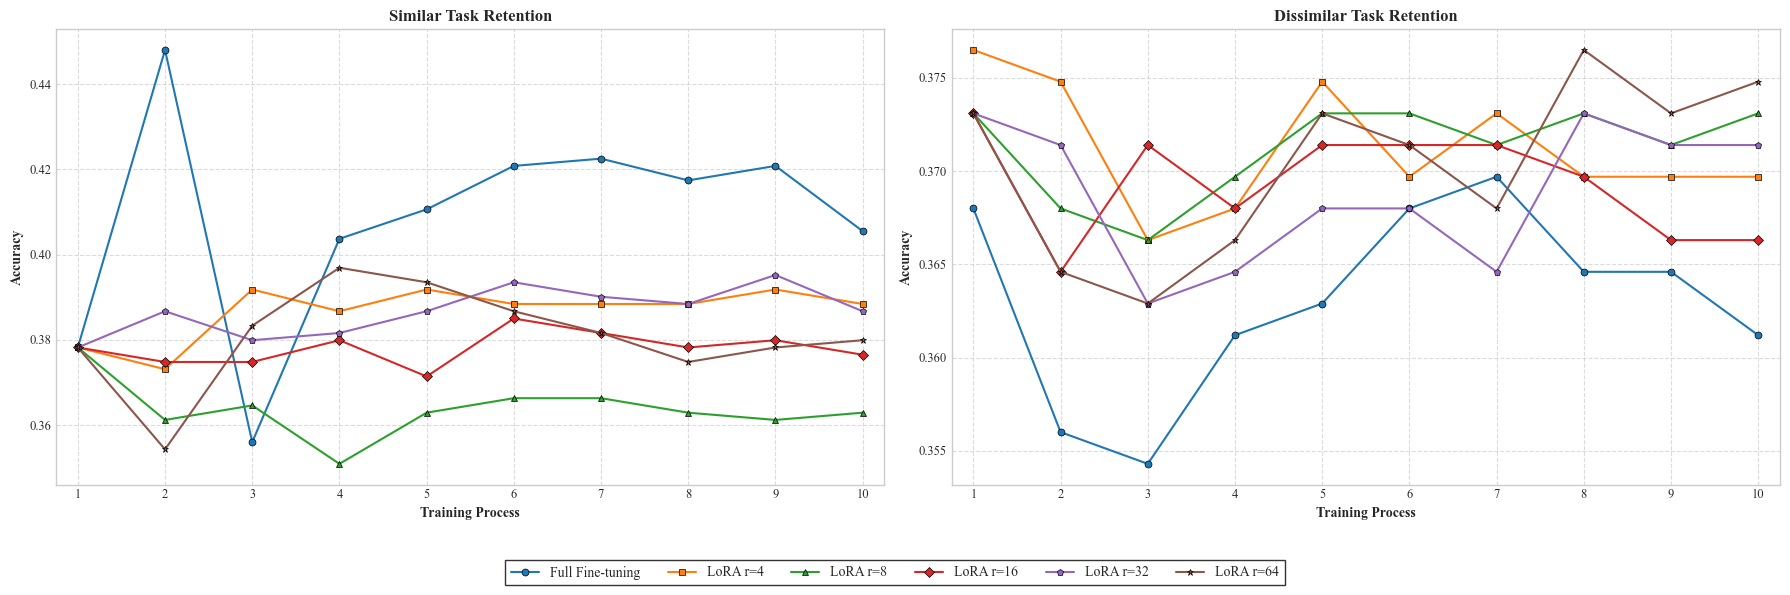

In [9]:
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
from matplotlib.gridspec import GridSpec

# Set professional style for academic publications
plt.style.use('seaborn-v0_8-whitegrid')
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = ['Times New Roman']
mpl.rcParams['axes.linewidth'] = 1.0
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['xtick.labelsize'] = 9
mpl.rcParams['ytick.labelsize'] = 9
mpl.rcParams['legend.fontsize'] = 9
mpl.rcParams['figure.figsize'] = (10, 10)
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.bbox'] = 'tight'

# Load data
with open("similar_retention.json", "r") as f:
    similar_models = json.load(f)

with open("dissimilar_retention.json", "r") as f:
    dissimilar_models = json.load(f)

# Define color palette
colors = {
    "FullFT_sst2_mnli_qqp": "#1f77b4",  # Dark blue
    "FullFT": "#1f77b4",  # Dark blue (same as above)
    "LoRA_4": "#ff7f0e",  # Orange
    "LoRA_8": "#2ca02c",  # Green
    "LoRA_16": "#d62728",  # Red
    "LoRA_32": "#9467bd",  # Purple
    "LoRA_64": "#8c564b"   # Brown
}

markers = {
    "FullFT_sst2_mnli_qqp": "o",
    "FullFT": "o",
    "LoRA_4": "s",
    "LoRA_8": "^",
    "LoRA_16": "D",
    "LoRA_32": "p",
    "LoRA_64": "*"
}

model_display_names = ["Full Fine-tuning", "LoRA r=4", "LoRA r=8", "LoRA r=16", "LoRA r=32", "LoRA r=64"]

# Create figure with 2 subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Similar Retention
lines1 = []
for i, model in enumerate(similar_models):
    # Limit to first 10 points
    steps = np.arange(1, 11)
    acc = similar_models[model]["accuracy"]["overall"][:10]
    
    # Draw curve
    line, = ax1.plot(
        steps, acc,
        label=model_display_names[i],
        color=colors[model],
        marker=markers[model],
        markersize=5,
        linewidth=1.5,
        markeredgecolor='black',
        markeredgewidth=0.5
    )
    
    lines1.append(line)

# Plot 2: Dissimilar Retention
lines2 = []
for i, model in enumerate(dissimilar_models):
    # Limit to first 10 points
    steps = np.arange(1, 11)
    acc = dissimilar_models[model]["accuracy"]["overall"][:10]
    
    # Draw curve
    line, = ax2.plot(
        steps, acc,
        label=model_display_names[i],
        color=colors[model],
        marker=markers[model],
        markersize=5,
        linewidth=1.5,
        markeredgecolor='black',
        markeredgewidth=0.5
    )
    
    lines2.append(line)

# Configure axes for both plots
for ax, title in zip([ax1, ax2], ["Similar Task Retention", "Dissimilar Task Retention"]):
    ax.set_xlabel('Training Process', fontweight='bold')
    ax.set_ylabel('Accuracy', fontweight='bold')
    ax.set_title(title, fontweight='bold', fontsize=12)
    ax.set_xticks(np.arange(1, 11))
    ax.set_xlim(0.75, 10.25)  # Add margin on both sides
    ax.grid(True, linestyle='--', alpha=0.7)

# Add a single legend for the entire figure
fig.legend(
    lines1, model_display_names,
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05),
    fontsize=10,
    frameon=True,
    fancybox=False,
    edgecolor='black',
    ncol=6  # Display legend items in 6 columns
)

# Adjust layout
plt.tight_layout(rect=[0, 0.08, 1, 0.98])
plt.savefig("retention.pdf", format='pdf', bbox_inches='tight')

print("Combined retention performance plot has been generated and saved.")